In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [7]:
mnist = keras.datasets.mnist
(imgs, labels), (test_imgs, test_labels) = mnist.load_data()
len(imgs)

60000

The dataset ``mnist`` is a large collection of handwritten digits as an image together with their actual digit as a number. Below is the first image and the first label.

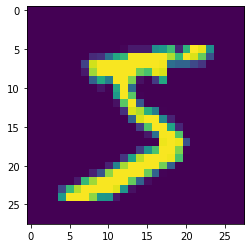

5


In [8]:
plt.figure()
plt.imshow(imgs[0])
plt.show()
print(labels[0])

Let's just look at the subcollection of elements that are either $0$ or $1$.

In [10]:
i01 = [i for i in range(len(labels)) if (labels[i]==0) or (labels[i]==1)]
imgs01 = imgs[i01]
labels01 = labels[i01]


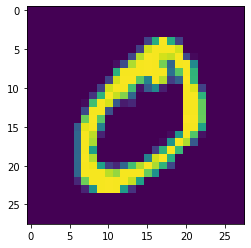

0


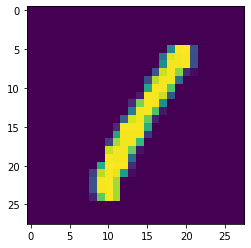

1


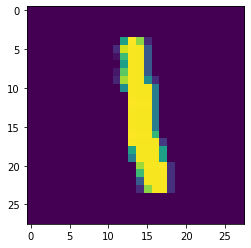

1


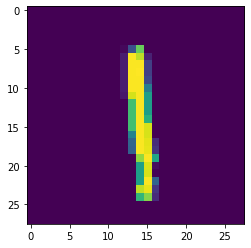

1


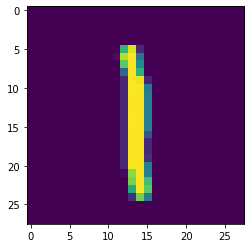

1


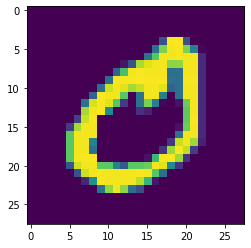

0


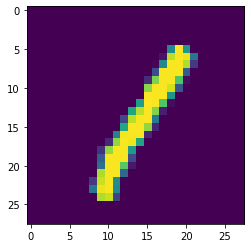

1


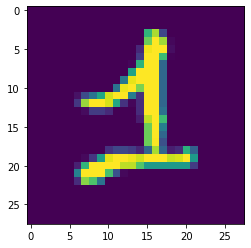

1


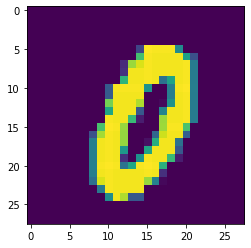

0


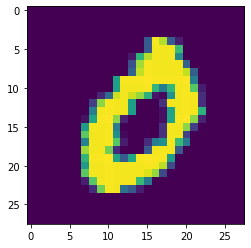

0


In [12]:
for j in range(10):
    plt.figure()
    plt.imshow(imgs01[j])
    plt.show()
    print(labels01[j])

We will now treat each of these images (which is a $28\times 28$ array) as a vector in $\mathbb R^{d}$ where $d = 28^2 = 784$. There are $n = 12665$ many images in our dataset. 

In [6]:
X = np.vstack([imgs01[i].flatten() for i in range(len(labels01))])
y = labels01
print(len(labels01))

12665


Our goal is to find a function $\hat{f}:\mathbb{R}^d\to \mathbb{R}$ such that for our examples $\{(\mathbf{x}_i,y_i): i = 1,\dotsm,n\}$ such that $\hat{f}(\mathbf{x}_i)\approx y_i$ for all $i$.

This is a problem of binary classification (we are only restricting to $0$ and $1$s) there is a natural way that we can approach this **supervised learning** problem. (It is **supervised** because we know the correct labels).

This will seem similar to the linear regression problem:

1) We define a class of functions $\widehat{\mathcal{F}}$ (a collection of classifiers)

2) We define a loss function $\ell(\hat{f},(\mathbf{x},y))$ which quantifies how close $\hat{f}(\mathbf{x})$ is to $y$.

We then want to find a function $\hat{f}$ which minimizes the average loss:
$$
\frac{1}{n} \sum_{i=1}^n \ell\left(\hat{f},(\mathbf{x}_i,y_i)\right).
$$

One example is *logistic regression* where we consider the classifiers of the form
$$
\hat{f}(\mathbf{x}) = \sigma\left(\mathbf{x}^T\boldsymbol{\theta}\right) \qquad \sigma(t) = \frac{1}{1+e^{-t}}
$$
where $\boldsymbol{\theta}\in\mathbb R^d$ is a parameter.

Note that $\sigma(5) \approx 6.7\times 10^{-3}$ and $\sigma(-5) \approx 0.993$.

We then use the cross-entropy loss (common with logistic regression)
$$
\ell\left(\hat{f},(\mathbf{x},y)\right) = -y\log(\sigma(\mathbf{x}^T\boldsymbol{\theta})) - (1-y) \log(1-\sigma(\mathbf{x}^T\boldsymbol{\theta})).
$$

We then want to minimize
$$
\min_{\boldsymbol{\theta}\in\mathbb R^d} - \sum_{i=1}^n y_i\log\left(\sigma\left(\mathbf{x}^T\boldsymbol{\theta}\right)\right) + (1-y) \log\left(\sigma\left(1-\mathbf{x}^T\boldsymbol{\theta}\right)\right).
$$